# Домашнє завдання до тем apply(), groupby(), pivot_table()

В цьому домашньому завданні продовжуємо працювати з набором даних `supermarket_sales.csv`.

0. Імпортуйте бібліотеку pandas та зчитайте дані у змінну `df` типу `pandas.DataFrame`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/supermarket_sales.csv')

1. Дослідимо, який філіал супермаркету ('Branch') є найприбутковішим. Для цього знайдіть сумарний прибуток за кожним філіалом і виявіть, який філіал має найвищий.

In [2]:
df.groupby('Branch').Total.sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [3]:
df.groupby('Branch')['gross income'].sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

Філія С має найвищий прибуток.

2. В якому місті знайходиться філіал з найвищим прибутком? Може в тому місці нам розмітисти ще один магазин.  
Знайдіть відповідь за допомогою функціоналу Pandas.

In [4]:
df[df.Branch == 'C'].City.unique()

array(['Naypyitaw'], dtype=object)

Філія `С` знаходиться у місті `Naypyitaw`.

3.1. Створіть зводну таблицю, яка покаже, скільки покупок (інвойсів) було зроблено в кожній з філій (`Branch`) за різними категоріями товарів. Запишіть таблицю в змінну `invoices_by_category` і виведіть змінну на екран.
Ця таблиця допоможе проаналізувати, в якій філії купують найбільше товарів кожної з категорій.

In [5]:
invoices_by_category = df.pivot_table(values='Invoice ID',
                                     index='Product line',
                                     columns='Branch',
                                     aggfunc='count')

invoices_by_category

Branch,A,B,C
Product line,,,
Electronic accessories,60,55,55
Fashion accessories,51,62,65
Food and beverages,58,50,66
Health and beauty,47,53,52
Home and lifestyle,65,50,45
Sports and travel,59,62,45


3.2. Викристовуючи змінну `invoices_by_category` дайте відповідь програмно (тобто значення треба не просто знайти очима, а вивести за допомогою коду), в якому філіалі магазину (`Branch`) найбільше інвойсів із покупкою товарів категорії "Електронні аксесуари" (`Electronic accessories`)?


In [6]:
invoices_by_category.loc['Electronic accessories'].idxmax()

'A'

Філія `A` має набільше покупок у категорії `Electronic accessories`.

4-6. **Творче завдання на розвиток аналітичного мислення**

Крок 1. Сформулюйте ТРИ питання (гіпотези) до наявних даних, які допомогли б вам зрозуміти, які користувачі що, де та коли найбільше/найменше купують, аби дати на основі цих гіпотез рекомендації бізнесу. Звісно питання мають бути не тими, на які ми вже відповіли в завданнях модулю.

Крок 2. Знайдіть відповіді на свої питання з допомогою функціоналу pandas.

Крок 3. Напишіть, як відповідь на це питання може бути використана для прийняття бізнес рішень.   
   
 Питання можуть бути будь-якої складності, але їх має бути 3. Кожне питання оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат 🙌


In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
453,568-88-3448,A,Yangon,Normal,Male,Health and beauty,25.00,1,1.250,26.250,3/3/2019,15:09,Ewallet,25.00,4.761905,1.250,5.5
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
766,801-88-0346,C,Naypyitaw,Normal,Female,Fashion accessories,76.06,3,11.409,239.589,1/5/2019,20:30,Credit card,228.18,4.761905,11.409,9.8


##### Питання (гіпотези):
1. Який тип покупців приносить найбільший дохід. Чи різняться ці дані для різних філій (міст).
2. В які дні тижня у розріці міст набільші покупки.
3. Яка лінійка продуктів приносить найбільший дохід (також у розрізі міст).

##### 1. Який тип покупців приносить найбільший дохід. Чи різняться ці дані для різних філій (міст).

In [112]:
df.groupby(['Customer type'])['gross income'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Customer type,,,
Member,501,7820.164,15.609110
Normal,499,7559.205,15.148707


Майже однакова кількість постійних покупців, що мають статус `Member`, та звичайних покупців. 
Однак `Member` приносять трохи більше доходу.

In [111]:
df.pivot_table(index='City',
               columns='Customer type',
               values='gross income',
               aggfunc=['count', 'sum', 'mean'])

count               sum                 mean           
Customer type Member Normal     Member    Normal     Member     Normal
City                                                                  
Mandalay         165    167  2557.3660  2499.666  15.499188  14.968060
Naypyitaw        169    159  2708.6325  2556.544  16.027411  16.078893
Yangon           167    173  2554.1655  2502.995  15.294404  14.468179

В усіх містах покупці зі статусом `Member` приносять більше доходу. Тільки у місті `Naypyitaw` звичайні покупці хоча і принесли менший дохід, у середньому дохід на 1 чек звичайного покупця більший.  

##### 2. В які дні тижня у розріці міст набільші покупки.

In [29]:
df.loc[0, 'Date']

'1/5/2019'

0    125
1    158
2    143
3    138
4    139
5    164
6    133
Name: Weekday, dtype: int64

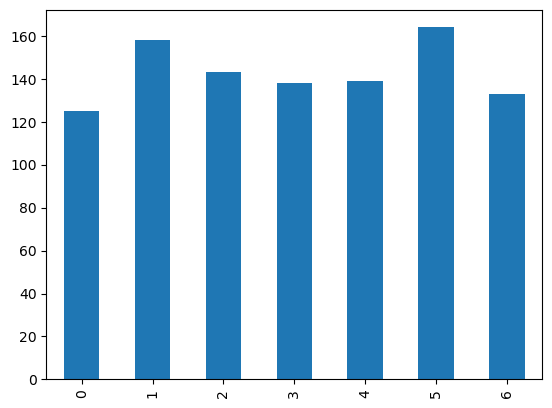

In [45]:
df['Weekday'] = pd.to_datetime(df.Date, format='%m/%d/%Y').dt.weekday
weekdays = df.Weekday.value_counts().sort_index()
display(weekdays)
weekdays.plot(kind='bar');

Найбільший дохід у вівторок та суботу. 

In [55]:
weekday_city = df.pivot_table(index='Weekday', columns='City',
                              values='gross income',
                              aggfunc='sum')
weekday_city

City,Mandalay,Naypyitaw,Yangon
Weekday,,,
0,606.4145,520.2530,678.0505
1,898.0590,841.3235,712.1530
2,605.1235,845.5150,631.7965
3,751.3630,673.7310,734.3940
4,686.5600,712.6055,692.5650
5,1013.5440,860.5225,798.3530
6,495.9680,811.2260,809.8485


In [64]:
def percent(x, total):
    return (x / total) * 100

weekday_city_percent = weekday_city.apply(percent, axis=1, total=weekday_city.sum())
weekday_city_percent

City,Mandalay,Naypyitaw,Yangon
Weekday,,,
0,11.991510,9.881017,13.407731
1,17.758618,15.979018,14.082072
2,11.965981,16.058626,12.493108
3,14.857786,12.795981,14.521865
4,13.576343,13.534314,13.694740
5,20.042270,16.343659,15.786586
6,9.807492,15.407385,16.013898


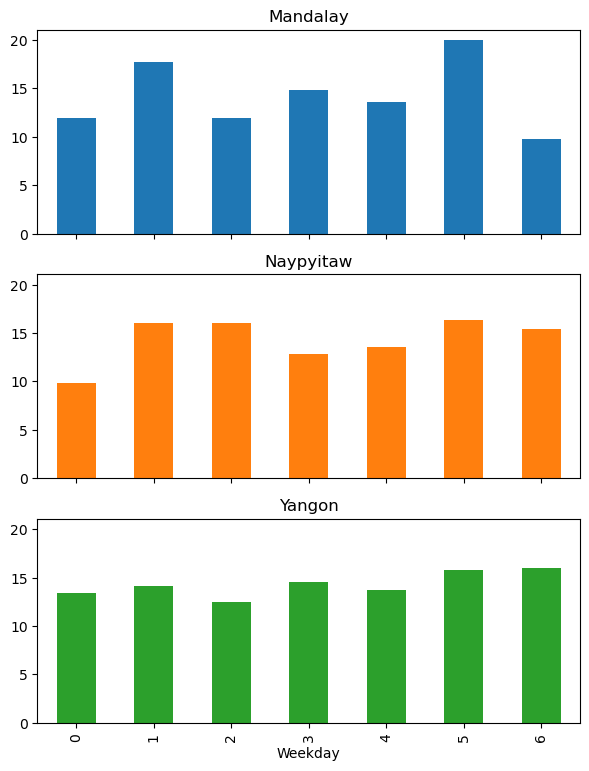

In [ ]:
weekday_city_percent.plot.bar(subplots=True,
                              figsize=(7, 9),
                              legend=False,
                              sharey=True);

Однак у розрізі міст подібна тенденція відсутня, для кожного міста свої особливості. 

##### 3. Яка лінійка продуктів приносить найбільший дохід (також у розрізі міст).

In [103]:
df.groupby(['Product line'])[['gross income']].sum().sort_values('gross income', ascending=False)

,gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


Найбільший дохід приносять катеорії `Food and beverages` та `Sports and travel`.

In [88]:
gross_income_by_category = df.pivot_table(values='gross income',
                                          index='Product line',
                                          columns='City',
                                          aggfunc='sum')

gross_income_by_category_percent = gross_income_by_category.apply(percent,
                                                                  axis=1,
                                                                  total=gross_income_by_category.sum())

gross_income_by_category_percent

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,16.056325,17.155826,17.247693
Fashion accessories,15.455439,19.499251,15.378956
Food and beverages,14.326951,21.495101,16.161055
Health and beauty,18.814593,15.027151,11.862250
Home and lifestyle,16.524999,12.567347,21.108397
Sports and travel,18.821692,14.255325,18.241650


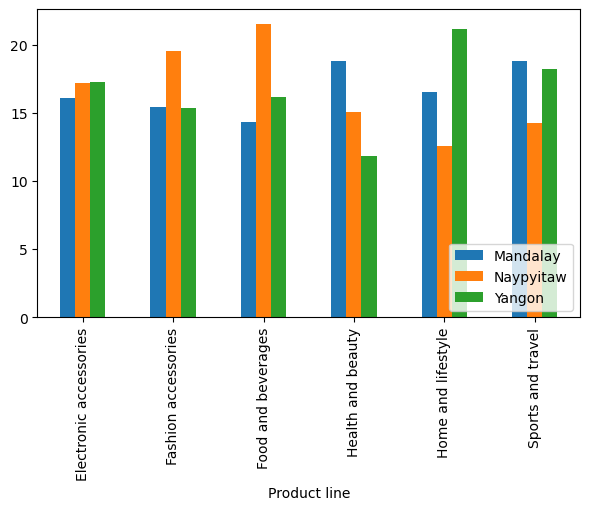

In [ ]:
gross_income_by_category_percent.plot.bar(figsize=(7, 4))
plt.legend(loc='lower right');

Для кожного міста свої топ категорії

In [110]:
for col in gross_income_by_category_percent.columns:
    print(col, gross_income_by_category_percent[col].sort_values().index[:2].to_list())

Mandalay ['Food and beverages', 'Fashion accessories']
Naypyitaw ['Home and lifestyle', 'Sports and travel']
Yangon ['Health and beauty', 'Fashion accessories']


#### Висновки-рекомендації

1. Заохочувати покупців отримувати та використовувати картку `Member`.
2. Дослідити необхідність можливого збільшення кількість наявного товару та продавців у найбільш активні дні покупок: віторок та субота у місті `Mandalay`, вівторок, середа та субота у `Naypyitaw`, субота та неділя у `Yangon`. 
3. Розширити асортимент у топ категоріях для кожного міста. 